In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import os
import pickle

In [2]:
#Reading the dataset
car_sales_df = pd.read_csv('Resources/car_combined_test_train.csv')
car_sales_df


,Index,Resale-Cat,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,0,Low,Gasoline,large car,3.0,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,1,Low,Gasoline,large car,3.0,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,3,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,4,Low,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,6,High,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
6,7,High,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,8,High,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
8,9,High,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,10,High,Gasoline,pickup,2.5,4,Man-6,2WD,6,19.0,26.0,22.0,5,No,406.0,103217,106583,20848


In [3]:
car_sales = car_sales_df.copy()

car_sales_clean = car_sales.copy()
car_sales_clean = car_sales_clean.drop(['Index','displ','cyl'], axis=1)
 

len(car_sales_clean.columns)


15

In [27]:
car_sales_sliced = car_sales_clean.copy()
bins = (3,17,20,114)
group_names = ['low-mpg','medium-mpg','high-mpg']
car_sales_sliced['cmb_mpg'] = pd.cut(car_sales_sliced['cmb_mpg'],bins = bins,labels = group_names)


In [28]:
car_sales_sliced['cmb_mpg'].unique()
car_sales_sliced['cmb_mpg'].value_counts()

medium-mpg    179
high-mpg      178
low-mpg       148
Name: cmb_mpg, dtype: int64

In [29]:
lb = LabelEncoder()
car_sales_encoded = car_sales_sliced.copy()
car_sales_encoded['cmb_mpg']= lb.fit_transform(car_sales_encoded['cmb_mpg'])
car_sales_encoded['Resale-Cat']= lb.fit_transform(car_sales_encoded['Resale-Cat'])    
car_sales_encoded['fuel_type']= lb.fit_transform(car_sales_encoded['fuel_type'])
car_sales_encoded['vehicle_class']= lb.fit_transform(car_sales_encoded['vehicle_class'])
car_sales_encoded['trans']= lb.fit_transform(car_sales_encoded['trans'])
car_sales_encoded['drive']= lb.fit_transform(car_sales_encoded['drive'])
car_sales_encoded['smartway']= lb.fit_transform(car_sales_encoded['smartway'])

car_sales_encoded.head()


,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,1,3,0,9,0,6,21.0,29.0,0,5,1,371.0,12071,8731,7909
1,1,3,0,9,0,6,21.0,29.0,0,5,1,371.0,12071,8731,7909
2,1,3,0,9,0,5,17.0,25.0,2,4,1,436.0,12071,8731,7909
3,1,3,0,9,0,6,17.0,25.0,2,4,1,436.0,12071,8731,7909
4,1,3,0,9,1,5,16.0,25.0,2,4,1,459.0,12071,8731,7909


In [46]:
car_sales_encoded.to_csv("Resources/car_sales_encoded.csv", index=False)

In [30]:
car_sales_encoded['cmb_mpg'].value_counts()


2    179
0    178
1    148
Name: cmb_mpg, dtype: int64

In [47]:
car_sales_encoded['smartway'].value_counts()

1    467
2     21
0     17
Name: smartway, dtype: int64

In [31]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('smartway', axis=1)
y = car_sales_ml['smartway']


## K Nearest Neighbors

In [32]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
### END SOLUTION


In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [34]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.992
k: 3, Train/Test Score: 0.989/0.961
k: 5, Train/Test Score: 0.989/0.961
k: 7, Train/Test Score: 0.984/0.969
k: 9, Train/Test Score: 0.963/0.953
k: 11, Train/Test Score: 0.974/0.992
k: 13, Train/Test Score: 0.976/0.992
k: 15, Train/Test Score: 0.989/0.984
k: 17, Train/Test Score: 0.989/0.976
k: 19, Train/Test Score: 0.966/0.945


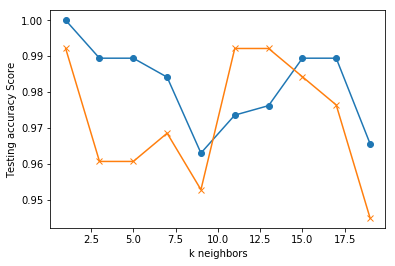

In [35]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [36]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.969


In [37]:
# save the model to disk
filename = 'Model/finalized_model_KN.sav'
pickle.dump(knn, open(filename, 'wb'))

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.968503937007874


In [39]:
df = pd.read_csv('Resources/encoded_output.csv')
new_df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)


In [40]:

newX = new_df.drop('smartway', axis=1)
newy = new_df['smartway']
print(newy)

0    1
1    2
2    1
3    0
4    2
Name: smartway, dtype: int64


In [41]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(newy)
print(newX)

   Resale-Cat  fuel_type  vehicle_class  trans  drive  smog_rating  city_mpg  \
0           1          1              0      3      1            6      16.0   
1           1          1              3      2      0            6      28.0   
2           0          1              2      1      1            5      23.0   
3           1          0              1      0      0           10     125.0   
4           1          2              0      3      1            3      43.5   

   hwy_mpg  cmb_mpg  Greenhouse_gas_score  comb_CO2  Sales_2016  Sales_2017  \
0     25.0        1                     4       459       12071        8731   
1     34.0        2                     7       295       14380       11467   
2     25.0        2                     5       375      180991      179188   
3    100.0        0                    10         0       13251       10458   
4     48.5        2                     9       214       12071        8731   

   Sales_2018  
0        7909  
1        491

In [42]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(newX, newy)

In [43]:
print(result)

0.8


In [44]:
ynew = loaded_model.predict(newX)

In [45]:
print (ynew)

[1 2 1 0 1]
